### Simulating subjects' expectations in learning-to-forecast experiments

# INTRODUCTION

The purpose of this project is to simulate what happens in learning-to-forecast experiments. By simulating subjects' expectations in such labs I hope to explain why certain aggregate behavior occurs as a result of individuals' expectations. In particular I want to analyze the adaptive expectations process in individuals and whether or not convergence to the rational expectations equilibrium occurs and what affects convergence. The question I ultimately hope to answer is "what conditions do market prices converge (or don't converge) to the rational expectations equilibrium (REE) and what affects the rate of this convergence?" 

I plan on answering this question by simulating subjects' expectation in learning-to-forecasts experiments. The simulation will involve six subjects making individual predictions for 50 periods using an adaptive process. The average of the individual predictions will then be the market expectation and this market expectation will be used in a Cobweb model to generate an optimal equilibrium price. Thus the equilibrium price will be affected by individual expectations and supply shocks. 

This is a topic of interest to me since I find stock market forecasting interesting. It's interesting to me that investor expectations are able to influence the stock market and the importance of accounting for market sentiment in making investment decisions.

In my research I found that individuals' adaptive expectations tend to lead to market prices converging to the REE in many cases. Such cases include the Cobweb model's stable case (including both negative and positive feedback). Additionally, although the price wouldn't converge to the REE in the unstable cases (both negative and positive feedback), in the unstable, negative feedback case sometimes the market price would reach a point where it was "close to" the REE, i.e. it would fluctuate about the REE while never converging to it or diverging infinitely.

# LITERATURE REVIEW

Several learning-to-forecast experiments have been conducted thus far such as Marimon and Sunder (1994), Gerber et al. (2002), Hommes et al (2005), Sutan and Willinger (2005), Adam (2007), and Heemeijer et al. (2008) (Hommes and Lux, 2008). In these labs, subjects make price forecasts. Taking into account these predictions, a computerized solution for the market equilibrium price is then given. Those with more accurate expectations yield "higher earnings".

Brock and Hommes (1997) used the cobweb model in their learning-to-forecast experiments and looked at three different scenarios: the stable case, the unstable case, and the strongly unstable case (Hommes and Lux, 2008). They found that in all of the cases, the sample mean of the actual market price was very close to the REE. However, the sample variance of the market price depended on which scenario was being tested. In the stable case, the variance was close to the variance of their rational expectations benchmark while in the other two cases the variance was significantly larger than the benchmark's. Additionally, in all of the scenarios they found that the market prices exhibited no significant linear autocorrelation.

Observations from other laboratory experiments found that individual subjects often don't behave fully rationally. Instead, they use simple processes in learning-to-forecast experiments, such as naive expectations (Tversky and Kahneman, 1974).

# ANALYSIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 63
b = 0
β = 1

T = 50

ε = np.random.randn(T) 

class Subject():
    def __init__(self):
        self.predictions = [np.random.randint(low=10,high=80)]
        self.λ = np.random.uniform()
        
    def predict(self):
        self.predictions.append(self.λ*p[-1] + (1-self.λ)*self.predictions[-1])

### Stable Case and Negative Feedback

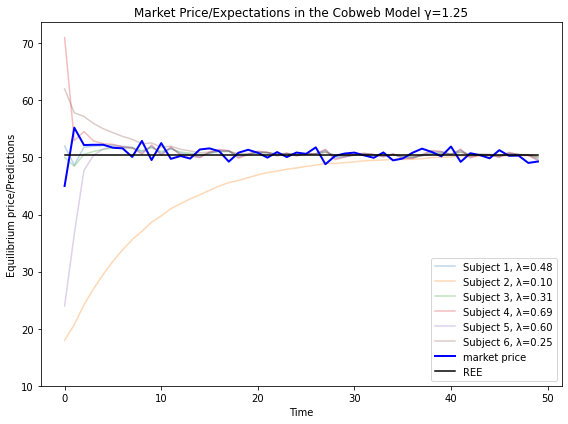

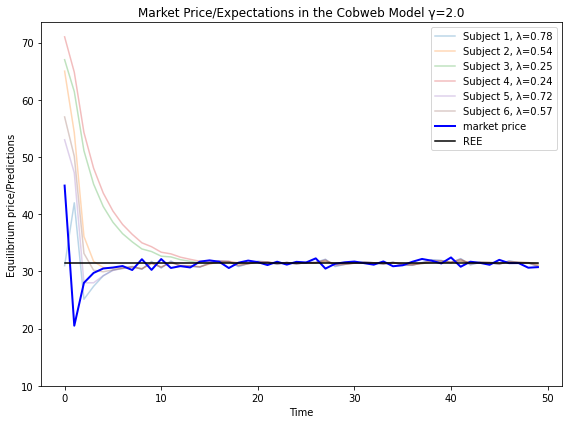

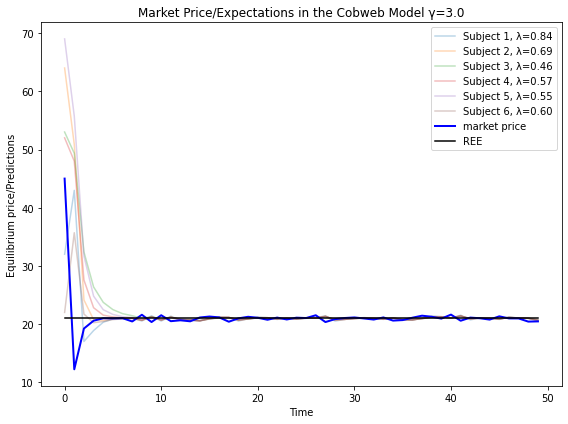

In [2]:
γ_list = [25/20,40/20,60/20]

for i in range(len(γ_list)): #repeat for different γ values
    γ = γ_list[i]

    p = [45]
    market_exp = []
    
    subjects = [Subject() for i in range(6)] #generate 6 subjects
    
    for t in range(1,T): #repeat for 50 periods
        prediction_total = 0
        for subject in subjects:
            subject.predict() #subject makes a prediction
            prediction_total += subject.predictions[-1]
        market_exp.append(prediction_total/len(subjects)) #market expectation = average of the predictions
        p.append((a-b)/γ - β/γ*(market_exp[-1] - (a-b)/γ) - ε[t]/γ) #plug market exp. into Cobweb model
    
    fig, ax = plt.subplots(figsize=(8,6))
    
    for index,subject in enumerate(subjects):
        ax.plot(range(T),subject.predictions,label=("Subject {}, λ={:.2f}".format(index + 1,subject.λ)),alpha=.3)

    ax.plot(range(T),p,label="market price",linewidth=2,color='blue')
    ax.plot(range(T),[(a-b)/γ]*T,label="REE",color='black')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Equilibrium price/Predictions')
    ax.set_title('Market Price/Expectations in the Cobweb Model γ={}'.format(γ))
    ax.legend()
    
    plt.tight_layout()
    plt.yticks(range(10,80,10))

**Results**: The stable, negative feedback case consistently converged to the REE. The bigger γ is compared to β, the faster the convergence occurred and the less volatile the fluctuations were between each period.

### Stable Case and Positive Feedback

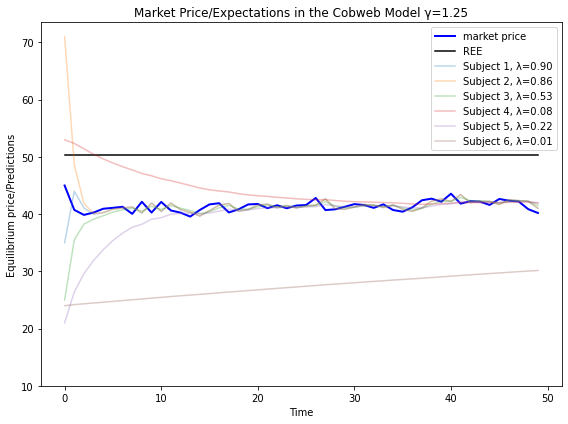

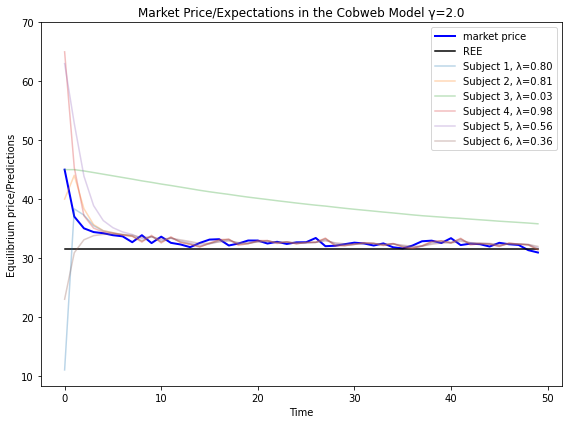

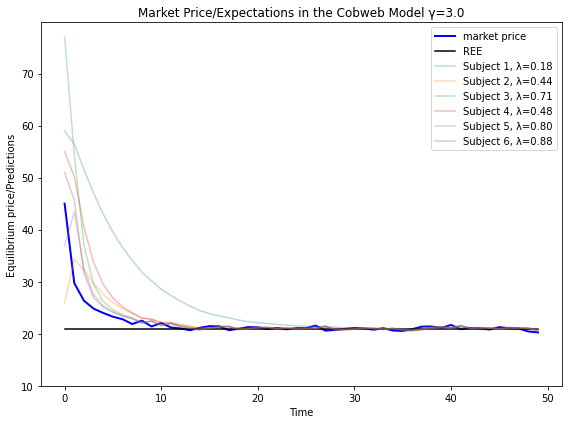

In [3]:
γ_list = [25/20,40/20,60/20]

for i in range(len(γ_list)):
    γ = γ_list[i]

    p = [45]
    market_exp = []
    
    subjects = [Subject() for i in range(6)]
    
    for t in range(1,T):
        prediction_total = 0
        for subject in subjects:
            subject.predict()
            prediction_total += subject.predictions[-1]
        market_exp.append(prediction_total/len(subjects))
        p.append((a-b)/γ + β/γ*(market_exp[-1] - (a-b)/γ) - ε[t]/γ)

    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(range(T),p,label="market price",linewidth=2,color='blue')
    ax.plot(range(T),[(a-b)/γ]*T,label="REE",color='black')
    
    for index,subject in enumerate(subjects):
        ax.plot(range(T),subject.predictions,label=("Subject {}, λ={:.2f}".format(index + 1,subject.λ)),alpha=.3)

    ax.set_xlabel('Time')
    ax.set_ylabel('Equilibrium price/Predictions')
    ax.set_title('Market Price/Expectations in the Cobweb Model γ={}'.format(γ))
    ax.legend(loc="best")
    
    plt.tight_layout()
    plt.yticks(range(10,80,10))

**Results**: The stable, positive feedback case consistently converged to the REE, however it took longer to than the stable, negative feedback case. Once again, the bigger γ is compared to β, the faster the convergence occurred and the less volatile the fluctuations were between each period.

### Unstable Case and Negative Feedback

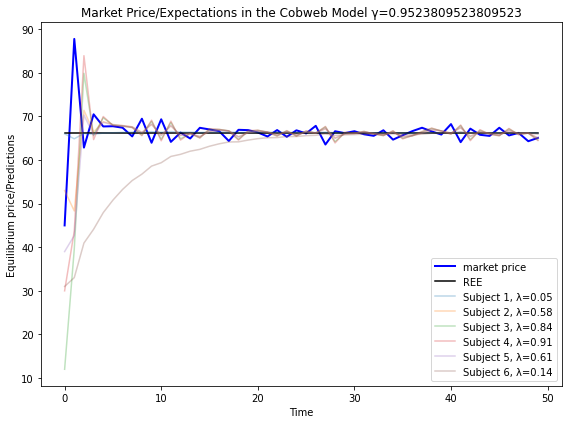

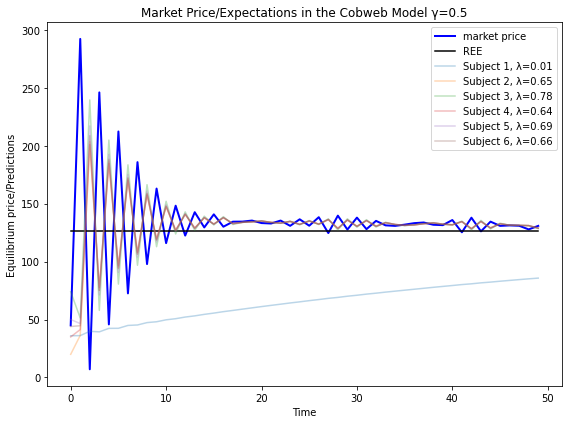

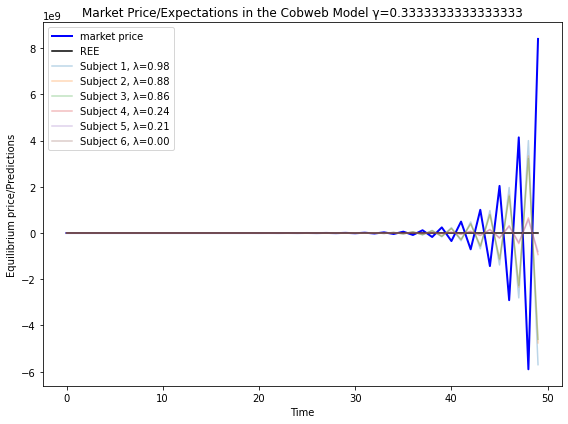

In [4]:
γ_list = [20/21,20/40,20/60]

for i in range(len(γ_list)):
    γ = γ_list[i]
    
    p = [45]
    market_exp = []
    
    subjects = [Subject() for i in range(6)]

    for t in range(1,T):
        prediction_total = 0
        for subject in subjects:
            subject.predict()
            prediction_total += subject.predictions[-1]
        market_exp.append(prediction_total/len(subjects))
        p.append((a-b)/γ - β/γ*(market_exp[-1] - (a-b)/γ) - ε[t]/γ)
        
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(range(T),p,label="market price",linewidth=2,color='blue')
    ax.plot(range(T),[(a-b)/γ]*T,label="REE",color='black')
    
    for index,subject in enumerate(subjects):
        ax.plot(range(T),subject.predictions,label=("Subject {}, λ={:.2f}".format(index + 1,subject.λ)),alpha=.3)
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Equilibrium price/Predictions')
    ax.set_title('Market Price/Expectations in the Cobweb Model γ={}'.format(γ))
    ax.legend()
    
    plt.tight_layout()

**Results:** The unstable, negative feedback case was inconsistent. Given the same γ, sometimes the market price would seemingly converge to the rational expectations equilibrium, while other times it would infinitely diverge. This indicates that the λ values or the initial predictions for individual subjects may play a role in convergence/diverence to the REE. In the cases where the market prices infinitely diverged, a smaller γ value led to a faster divergence (with each period the magnitude of the fluctuations increased at faster rates). Additionally, it seems the larger the γ value, the less likely an infinite divergence would occur.

(Rerun the code to see instances where each γ may lead to either a convergence/divergence in the market price).

### Unstable Case and Positive Feedback

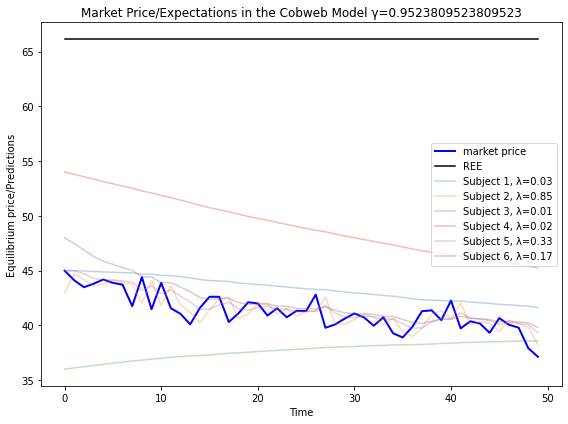

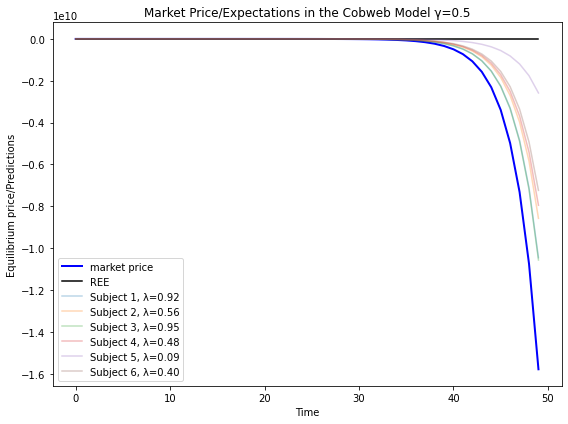

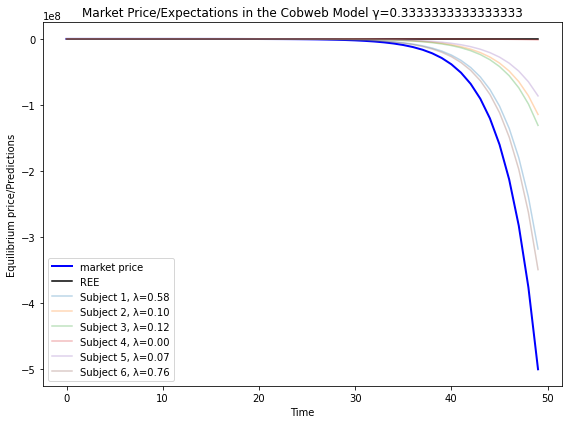

In [5]:
γ_list = [20/21,20/40,20/60]

for i in range(len(γ_list)):
    γ = γ_list[i]

    p = [45]
    market_exp = []
    
    subjects = [Subject() for i in range(6)]
    
    for t in range(1,T):
        prediction_total = 0
        for subject in subjects:
            subject.predict()
            prediction_total += subject.predictions[-1]
        market_exp.append(prediction_total/len(subjects))
        p.append((a-b)/γ + β/γ*(market_exp[-1] - (a-b)/γ) - ε[t]/γ)
        
    fig, ax = plt.subplots(figsize=(8,6))

    ax.plot(range(T),p,label="market price",linewidth=2,color='blue')
    ax.plot(range(T),[(a-b)/γ]*T,label="REE",color='black')
    
    for index,subject in enumerate(subjects):
        ax.plot(range(T),subject.predictions,label=("Subject {}, λ={:.2f}".format(index + 1,subject.λ)),alpha=.3)

    ax.set_xlabel('Time')
    ax.set_ylabel('Equilibrium price/Predictions')
    ax.set_title('Market Price/Expectations in the Cobweb Model γ={}'.format(γ))
    ax.legend()
    
    plt.tight_layout()

**Results:** The unstable, positive feedback case consistently diverged (infinitely). Similar to the unstable, negative feedback case, a smaller γ value led to a faster divergence. However, in the unstable, negative feedback case the market price would diverge due to increases in fluctuations each period, meanwhile in this case the market price was almost monotonic in its divergence.

### Case Where β = γ

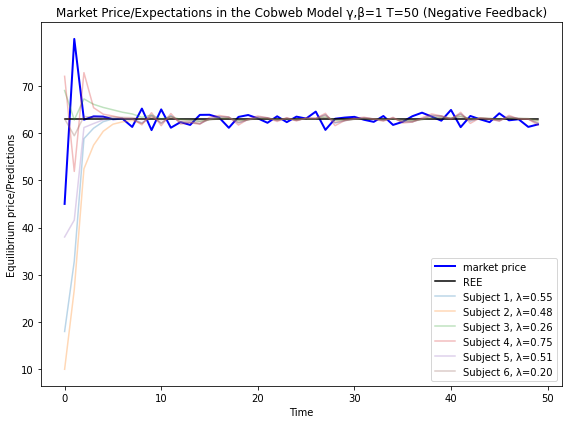

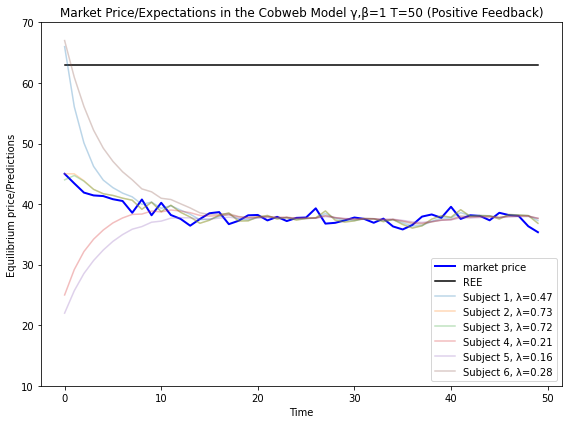

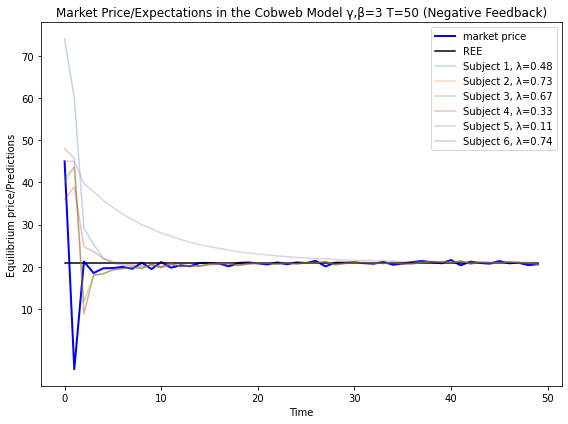

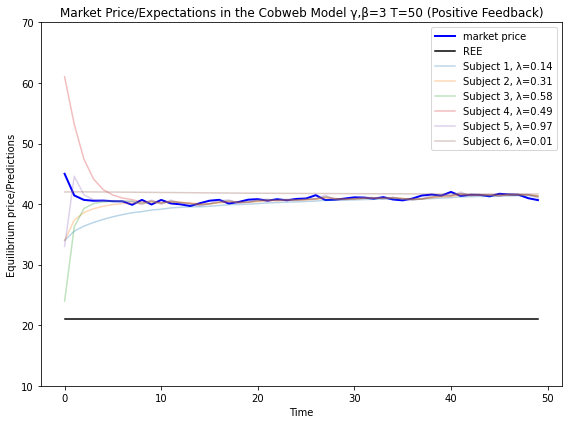

In [6]:
#T = 1000
values = [1,3]

for value in values:
    β = value
    γ = value
    for i in range (2):
        p = [45]
        market_exp = []
    
        subjects = [Subject() for i in range(6)]
        for t in range(1,T):
            prediction_total = 0
            for subject in subjects:
                subject.predict()
                prediction_total += subject.predictions[-1]
            market_exp.append(prediction_total/len(subjects))
            if i == 0:
                p.append((a-b)/γ - β/γ*(market_exp[-1] - (a-b)/γ) - ε[t]/γ)
            else:
                p.append((a-b)/γ + β/γ*(market_exp[-1] - (a-b)/γ) - ε[t]/γ)            
        
        fig, ax = plt.subplots(figsize=(8,6))

        ax.plot(range(T),p,label="market price",linewidth=2,color='blue')
        ax.plot(range(T),[(a-b)/γ]*T,label="REE",color='black')
    
        for index,subject in enumerate(subjects):
            ax.plot(range(T),subject.predictions,label=("Subject {}, λ={:.2f}".format(index + 1,subject.λ)),alpha=.3)
    
        ax.set_xlabel('Time')
        ax.set_ylabel('Equilibrium price/Predictions')
        if i == 0:
            ax.set_title('Market Price/Expectations in the Cobweb Model γ,β={} T={} (Negative Feedback)'.format(γ,T))
        else:
            ax.set_title('Market Price/Expectations in the Cobweb Model γ,β={} T={} (Positive Feedback)'.format(γ,T))
        ax.legend()
    
        plt.tight_layout()
        plt.yticks(range(10,80,10))

**Results**: In the case where β = γ, if there was negative feedback then the market price would converge to the REE. If there was positive feedback then the market price was sporadic. The larger β,γ were, the smaller the fluctuations were.

(Rerun the code but try a larger value of T to see the random walk better)

# DISCUSSION/CONCLUSION

These results suggest a few things. One is that individuals' adaptive expectations cause fluctuations in the market price. We see that in the stable case the subjects' prediction errors fluctuate less and less, causing the market price to fluctuate less and less until the market price converges to the REE. However, in the unstable case the subjects' prediction errors actually grow and cause a divergence in the market price. This suggests that adaptive expectations in the stable case are reasonable individual expectations. However, since the subjects' predictions are getting worse in the unstable case, human subjects should recognize this and would then change their forecasting behavior. So, in the labs it should be observed that adaptive individual expectations cause a convergence to the REE in the stable cases, and a divergence in the unstable cases. Thus, if there were convergences to the REE in the unstable case, it is implied that a different behavior (such as rational expectations) might be more reasonable to assume. Additionally, we see that the rate of convergence to the REE and volatility in fluctuations is affected by not only the ratio between γ and β, but also by their individual sizes.

# BIBLIOGRAPHY

- Bao, Te, et al. “Learning, Forecasting and Optimizing: An Experimental Study.” *SSRN Electronic Journal*, 2012,
    https://doi.org/10.2139/ssrn.2007116. 
    
- Feldman, Mark. “An Example of Convergence to Rational Expectations with Heterogeneous Beliefs.” *International* 
    *Economic Review*, vol. 28, no. 3, 1987, https://doi.org/10.2307/2526571. 
    
- Hommes, Cars, and Thomas Lux. “Individual Expectations and Aggregate Behavior in Learning-to-Forecast Experiments.” 
    *Macroeconomic Dynamics*, vol. 17, no. 2, 2011, https://doi.org/10.1017/s1365100511000162. 